# Data Preprocessing

In [69]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plta
from matplotlib.lines import Line2D
# Load the dataset
data = pd.read_csv('dataset_converted.csv')

# 1. Eksik Verilerin Silinmesi
data = data.dropna()

# 2. Anlamsız veya Sabit Sütunları Çıkarma
data = data.drop(columns=["ID", "Z_CostContact", "Z_Revenue"])

# 3. Yeni Özellikler Oluşturma
# Age (Yaş) özelliği oluşturma
current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']


# Merge "Alone" status into "Single"
data['Marital_Status'] = data['Marital_Status'].replace({"Alone": "Single"})

# Create Income Class Feature
# Divide income into three classes: Low, Mid, and Upper Class
income_thresholds = [0, 40000, 70000, data['Income'].max()]
income_labels = ['LowClass', 'MidClass', 'UpperClass']
data['IncomeClass'] = pd.cut(data['Income'], bins=income_thresholds, labels=income_labels, include_lowest=True)

# CustomerForYears (Kaç yıldır müşteri) özelliği
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data['CustomerForYears'] = current_year - data['Dt_Customer'].dt.year

# NumberOfAccepted (Kabul edilen kampanyaların toplamı)
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
data['NumberOfAccepted'] = data[campaign_cols].sum(axis=1)

# TotalSpend (Toplam harcama)
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['TotalSpend'] = data[spend_cols].sum(axis=1)

# 4. Outlier Tespiti ve Temizleme
# Outlier tespiti için IQR yöntemi uygulanıyor
numeric_cols = ['Income', 'Age', 'TotalSpend', 'CustomerForYears']
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Aykırı değerleri temizleme
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]



### What is the distribution of customer income and at which income levels do the majority of customers fall?

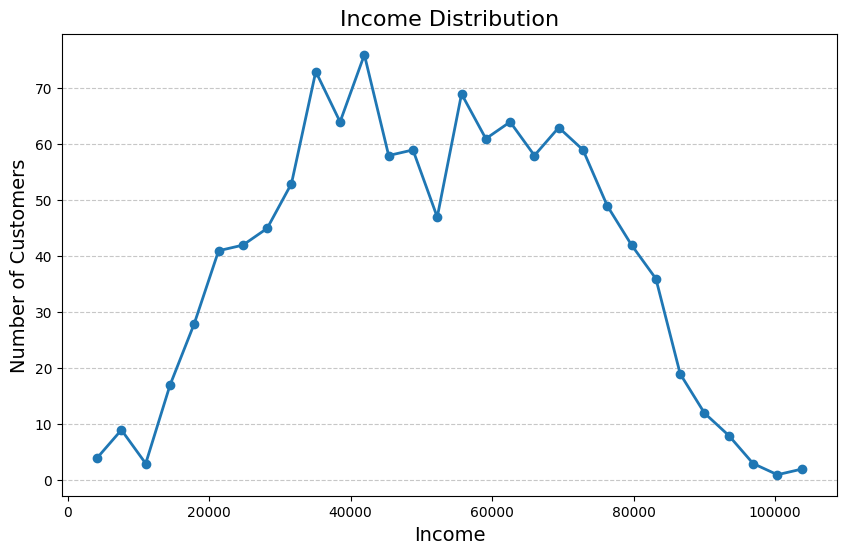

In [70]:
# Gelir dağılımını line chart ile görselleştirme
income_counts, income_bins = np.histogram(data['Income'], bins=30)  # Histogram verileri
income_bin_centers = (income_bins[:-1] + income_bins[1:]) / 2  # Binlerin merkezleri

plt.figure(figsize=(10, 6))
plt.plot(income_bin_centers, income_counts, marker='o', linestyle='-', linewidth=2)
plt.title('Income Distribution', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### How does the average spending differ across income classes for various product categories?

C:\Users\yagiz\AppData\Local\Temp\ipykernel_8836\3073334342.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



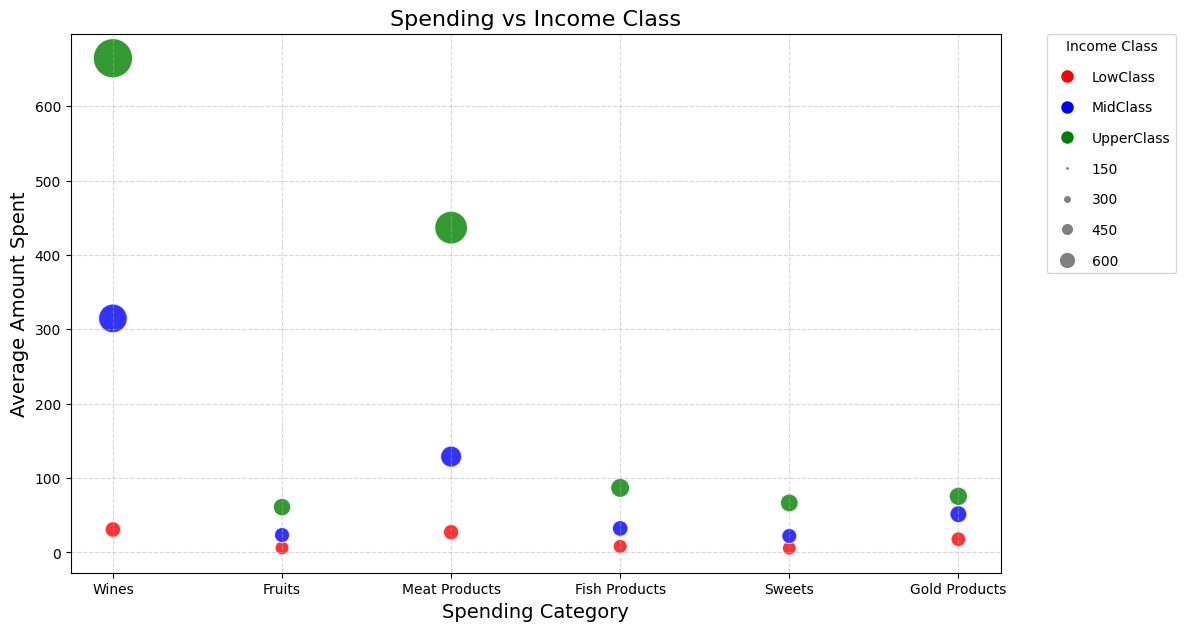

In [71]:
spend_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spend_data = data.groupby('IncomeClass')[spend_columns].mean().reset_index()

# Rename columns for better x-axis labels
spend_data = spend_data.rename(columns={
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat Products',
    'MntFishProducts': 'Fish Products',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold Products'
})

# Melt the data for easier plotting
spend_data_melted = spend_data.melt(id_vars='IncomeClass', var_name='Category', value_name='AverageSpent')

# Bubble Chart
plt.figure(figsize=(12, 7))
sns.scatterplot(data=spend_data_melted, x='Category', y='AverageSpent', 
                size='AverageSpent', hue='IncomeClass', sizes=(100, 800), 
                palette={'LowClass': 'red', 'MidClass': 'blue', 'UpperClass': 'green'}, 
                edgecolor='w', alpha=0.8)

plt.title('Spending vs Income Class', fontsize=16)
plt.xlabel('Spending Category', fontsize=14)
plt.ylabel('Average Amount Spent', fontsize=14)

# Custom Legend with Bubble Size Explanation and Spacing
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='LowClass'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='MidClass'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='UpperClass')
]


# Custom Legend with Bubble Size Explanation and Spacing
custom_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='LowClass'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='MidClass'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='UpperClass')
]

# Custom bubble size legend with spacing
bubble_sizes = [150, 300, 450, 600]
for size in bubble_sizes:
    custom_legend.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=size / 50, label=f'{size}'))

plt.legend(handles=custom_legend, title='Income Class', 
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2)

plt.grid(linestyle='--', alpha=0.5)
plt.xticks(rotation=0)  # Remove x-axis text rotation
plt.show()

### How does wine spending vary based on marital status, and which group shows the highest variability or outliers in spending?

C:\Users\yagiz\AppData\Local\Temp\ipykernel_8836\914364903.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




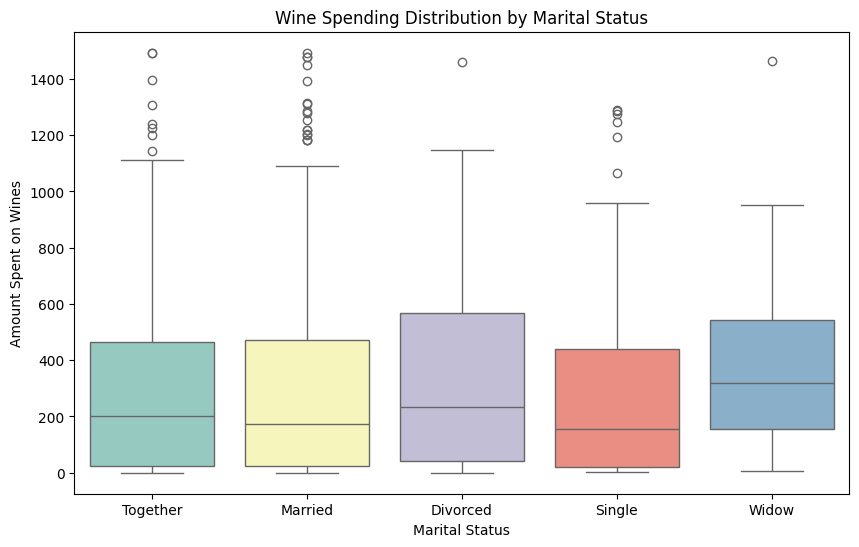

In [72]:
# Box plot: Total Wine Spending by Marital Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Marital_Status', y='MntWines', palette='Set3')
plt.title("Wine Spending Distribution by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Amount Spent on Wines")
plt.show()

### How does total spending vary across different income classes, and which income group shows the widest distribution in spending patterns?

C:\Users\yagiz\AppData\Local\Temp\ipykernel_8836\748978899.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




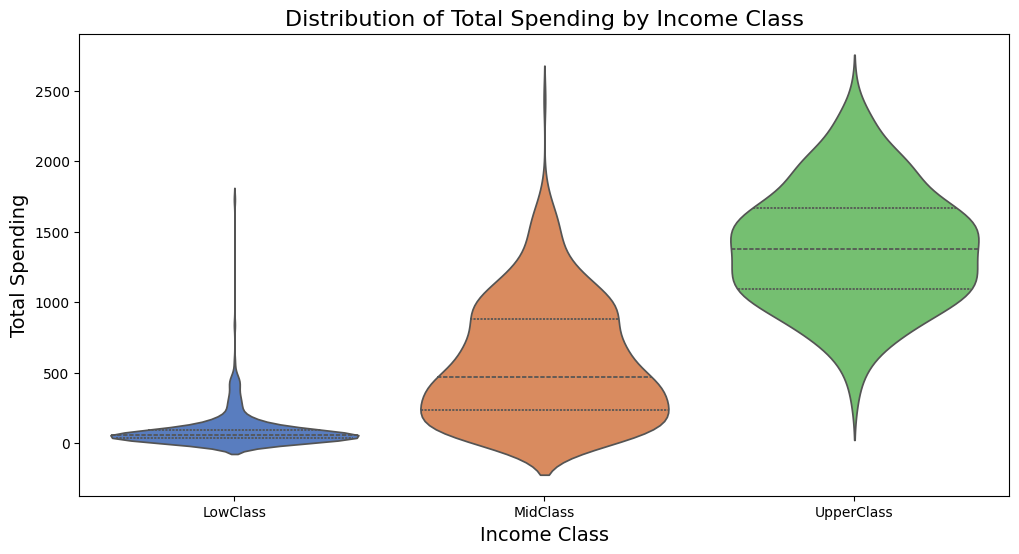

In [73]:
# Violin plot: Total Spending by Income Class
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='IncomeClass', y='TotalSpend', palette='muted', inner='quartile')
plt.title("Distribution of Total Spending by Income Class", fontsize=16)
plt.xlabel("Income Class", fontsize=14)
plt.ylabel("Total Spending", fontsize=14)
plt.show()

### What are the correlations between acceptances of different campaigns, and which campaigns show the strongest positive or negative relationships?

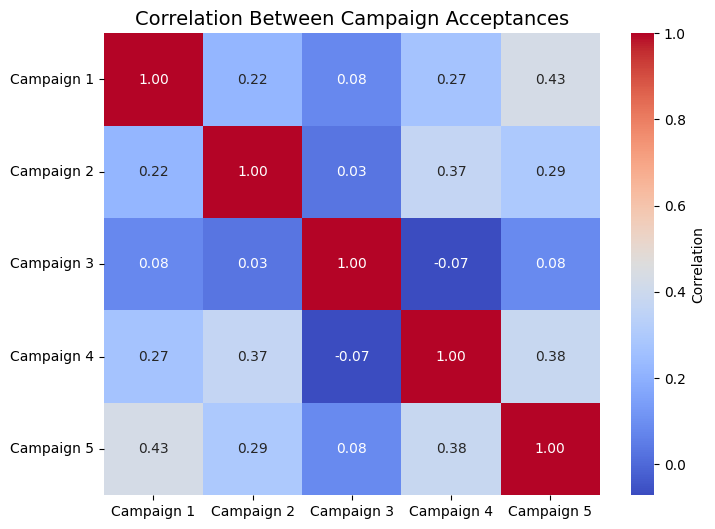

In [74]:
# Rename campaign columns for better display
campaign_renamed = {
    'AcceptedCmp1': 'Campaign 1',
    'AcceptedCmp2': 'Campaign 2',
    'AcceptedCmp3': 'Campaign 3',
    'AcceptedCmp4': 'Campaign 4',
    'AcceptedCmp5': 'Campaign 5'
}
renamed_data = data.rename(columns=campaign_renamed)

# Calculate correlation for renamed campaign columns
campaign_cols_renamed = list(campaign_renamed.values())
campaign_corr = renamed_data[campaign_cols_renamed].corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(campaign_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation'})

# Adjust labels for better display
plt.title("Correlation Between Campaign Acceptances", fontsize=14)
plt.xticks(rotation=0)  # Make x-axis labels horizontal
plt.yticks(rotation=0)  # Make y-axis labels horizontal
plt.show()

# INTERACTIVITY

In [75]:
import plotly.express as px

# Step 1: Prepare Data
spend_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spend_data = data.groupby('IncomeClass')[spend_columns].mean().reset_index()

# Rename columns for clarity
spend_data = spend_data.rename(columns={
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat Products',
    'MntFishProducts': 'Fish Products',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold Products'
})

# Melt data for Plotly compatibility
spend_data_melted = spend_data.melt(id_vars='IncomeClass', var_name='Category', value_name='AverageSpent')

# Step 2: Create Interactive Bubble Chart
fig = px.scatter(
    spend_data_melted,
    x='Category',
    y='AverageSpent',
    size='AverageSpent',
    color='IncomeClass',
    title="Interactive Bubble Chart: Spending by Income Class",
    labels={'Category': 'Spending Category', 'AverageSpent': 'Average Amount Spent'},
    hover_data={'AverageSpent': ':.2f', 'IncomeClass': True},
    template='plotly_white'
)

# Step 3: Layout Adjustments
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    xaxis_title="Spending Category",
    yaxis_title="Average Amount Spent",
    legend_title="Income Class"
)

# Step 4: Show the Interactive Chart
fig.show()

C:\Users\yagiz\AppData\Local\Temp\ipykernel_8836\1424808101.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



How does spending vary across different marital statuses for each product category (e.g., Wines, Fruits, Meat Products), and what insights can we gain from the interactive analysis?

In [76]:



# Spending Categories
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Melt the dataset for box plot visualization
spend_data = data.melt(
    id_vars=['Marital_Status'], 
    value_vars=spend_cols, 
    var_name='SpendingCategory', 
    value_name='AmountSpent'
)

# Unique spending categories for dropdown
categories = spend_data['SpendingCategory'].unique()

# Create the interactive box plot
fig = go.Figure()

# Add box plot traces for each spending category (initially visible for 'MntWines')
for category in categories:
    fig.add_trace(go.Box(
        x=spend_data.loc[spend_data['SpendingCategory'] == category, 'Marital_Status'],
        y=spend_data.loc[spend_data['SpendingCategory'] == category, 'AmountSpent'],
        name=category.replace('Mnt', ''),  # Clean category name
        visible=(category == 'MntWines')  # Only MntWines is visible initially
    ))

# Dropdown menu for interactivity
dropdown_buttons = [
    {
        'label': category.replace('Mnt', ''),
        'method': 'update',
        'args': [
            {'visible': [cat == category for cat in categories]},  # Toggle visibility
            {'title': f"Spending Distribution: {category.replace('Mnt', '')} by Marital Status"}
        ]
    }
    for category in categories
]

# Update layout with dropdown
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.1,
        'y': 1.15,
        'xanchor': 'left',
        'yanchor': 'top'
    }],
    title="Spending Distribution: Wines by Marital Status",
    xaxis_title="Marital Status",
    yaxis_title="Amount Spent"
)

# Show the interactive plot
fig.show()

How does the income distribution vary across different education levels, and which income ranges have the highest concentration of customers for each group?

In [77]:
# Group data: count the number of customers per income for each education level
income_distribution = data.groupby(['Income', 'Education']).size().reset_index(name='Number of Customers')

# Filter Income to include only values up to 100,000
income_distribution = income_distribution[income_distribution['Income'] <= 100000]

# Interactive Line Chart with Dropdown for Education Filtering
fig = px.line(
    income_distribution,
    x='Income',
    y='Number of Customers',
    color='Education',  # Education levels as filters using color
    title="Interactive Income Distribution by Education",
    labels={"Income": "Income", "Number of Customers": "Number of Customers", "Education": "Education Level"},
    markers=True
)

# Adjust X-axis to ensure upper limit is 100,000
fig.update_layout(
    xaxis=dict(title="Income", range=[0, 100000]),  # Fix X-axis range
    yaxis=dict(title="Number of Customers"),
    legend_title="Education Level",
    hovermode="x unified"  # Unified hover mode for better tooltips
)

# Display the interactive chart
fig.show()